In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##QUESTION 1
#Suppose you are going on a weekend trip to a city that is d miles away.  Develop a model that determines your 
#round-trip gasoline costs.  What assumptions or approximations are necessary to make your model deterministic?  
#Are these assumptions or approximations acceptable to you? 
    #a.  Draw an influence chart and build a model for this problem.  
    #b.  Use your model to generate some relevant sensitivity analysis.

In [3]:
##QUESTION 2
#Suppose we have the following mathematical model of a production systemmax10𝑥𝑥s.   
#t.𝑎𝑎𝑥𝑥 ≤40𝑥𝑥 ≥0wherea is the number hours of production time required for each unit produced.  
#With a = 5, the optimal solution is x= 8.  If we have a stochastic model with a = 3, a = 4, a = 5, and a = 6 
#as the possible values for the number of hours required per unit, what is the optimal value for x?  
#What challenges does this stochastic model cause?

In [4]:
##QUESTION 3

#Over a five year period, the quarterly change in the share price for a company ranged from -8% to 12%.  
#The current share price is $80.00, and we would like to understand the distribution of this share price in two years 
#(eight quarters).

In [5]:
#Parameters
share_price = 80
quarters = 8

(array([  56.,  641., 1940., 2764., 2336., 1418.,  615.,  181.,   41.,
           8.]),
 array([ 51.36336001,  62.09740877,  72.83145752,  83.56550627,
         94.29955502, 105.03360377, 115.76765252, 126.50170127,
        137.23575002, 147.96979878, 158.70384753]),
 <a list of 10 Patch objects>)

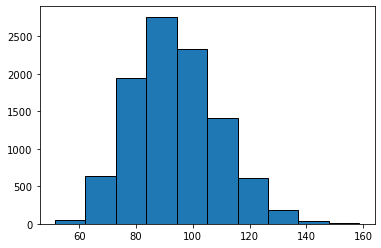

In [6]:
trials = 10000
sample = list()
for i in range (trials):
    new_share_price = share_price
    for q in range (quarters):
        share_changed = rd.uniform(-0.08,0.12)
        new_share_price = (1+share_changed) * new_share_price
    sample.append(new_share_price)
plt.hist(sample, edgecolor = 'k')
    


In [7]:
#3a.Using a sample size of 10,000 trials, generate a histogram of the share price at the end of two years.
mean_share_price = np.mean(sample)
std_share_price = np.std(sample)
print('Mean = $%5.2f, Std = $%5.2f' % (mean_share_price, std_share_price))

Mean = $93.90, Std = $15.12


In [8]:
#3b.Estimate the expected share price at the end of 2 years and compute a 90% confidence interval for this estimate
sample_mean = np.mean(sample)
sample_std = np.std(sample)
moe = 1.96*sample_std/len(sample)**0.5
lci = sample_mean - moe
uci = sample_mean + moe
print('Margin of error = %5.2f'% moe)
print('Lower confidence interval = %5.2f'% lci)
print('Upper confidence interval = %5.2f'% uci)
print('The 95%% confidence interval for the sample mean is (%6.2f, %6.2f)'% (lci,uci))

Margin of error =  0.30
Lower confidence interval = 93.60
Upper confidence interval = 94.20
The 95% confidence interval for the sample mean is ( 93.60,  94.20)


In [9]:
#3c.Estimate the probability the share value at the end of 2 years is at least $100 and compute a 95% confidence 
#interval for this probability estimate.
proportion = sum(1 for x in sample if x > 100)/len(sample)
print('There is a %5.2f%% probability of making a profit of at least $100 on one day.'% (100*proportion))

moe = 1.96*(proportion *(1 - proportion)/len(sample)**0.5)
lci = proportion - moe
if lci < 0.0: lcl = 0.0
uci = proportion + moe

print('The 95%% confidence interval for the sample mean is (%4.2f, %4.2f)'% (lci,uci))

There is a 32.73% probability of making a profit of at least $100 on one day.
The 95% confidence interval for the sample mean is (0.32, 0.33)


In [10]:
##QUESTION 4
#A company is considering the introduction of a new product.  The fixed cost to launch this product is $30,000.  
#The variable cost for the product is uniformly distributed between $16 and $24 per unit.  
#The product will sell for $50 per unit.  The demand for the product is normally distributed with a mean of 1,200 units 
#and a standard deviation of 300 units.  Construct a simulation model for this problem and use a sample size of 10,000 
#trials to answer the following questions.
    #a.  What is the distribution of the outcome from this new product launch? 
    #b.  What is your assessment of the associated risk? 
    

In [11]:
#input paremeters


In [12]:
##QUESTION 5

#  A real estate investment firm purchases, develops, and then resells property for a profit.  
#A new property is available which the firm believes could be resold at a price of $160,000.  
#The current property owner has requested bids from the firm and two other competitors and will sell the property to 
#the highest bidder in 2 excess of $100,000.  Assume that the bids made by each of the two competitors will be 
#uniformly distributed from $100,000 to $150,000.  Construct a simulation model for this problem and use a sample size
#of 10,000 trials to answer the following questions.
    #d.  What is the expected value of perfect information for this problem 

In [18]:
house_price = 160000
trials = 10000
bid_firm = 130000
bid_min = 100000
bid_max = 150000

(array([ 757.,  691.,  732.,  692.,  680.,  604.,  584.,  571.,  546.,
        4143.]),
 array([10001.15374077, 12001.03836669, 14000.92299261, 16000.80761854,
        18000.69224446, 20000.57687038, 22000.46149631, 24000.34612223,
        26000.23074815, 28000.11537408, 30000.        ]),
 <a list of 10 Patch objects>)

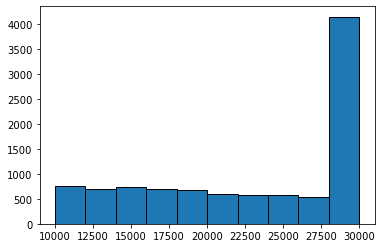

In [19]:
#simulation 
rd.seed(101010)
trials = 10000
sample = list()
index = [0 for i in range(trials)]
for i in range (trials):
    bid_ofthefirm = bid_firm
    bid_competitor_1 = rd.uniform(bid_min,bid_max)
    bid_competitor_2 = rd.uniform(bid_min,bid_max)
    bid_win = max (bid_firm, bid_competitor_1, bid_competitor_2)
    if bid_win == bid_ofthefirm:
        index[i]=1
    else: 
        index[i]=0
    profit = house_price - bid_win
    sample.append(profit)

plt.hist(sample, edgecolor = 'k')    


In [21]:
##a.What is the probability the firm will win the bidding process if it offers $130,000 for the new property? 
    #Provide a 95% confidence interval for your estimate.
    
proportion = 100*sum(1 for i in index if i >= 1.0)/len(index)
print('The probability the firm will win the bidding process if it offers $130000 is %5.2f%%' % proportion)

proportion = 100*sum(1 for i in index if i >= 1.0)/len(index)
moe = 1.96*(proportion *(1 - proportion)/len(sample)**0.5)
lci = proportion - moe
uci = proportion + moe
print('Lower confidence interval = %5.2f%%'% lci)
print('Upper confidence interval = %5.2f%%'% uci)

The probability the firm will win the bidding process if it offers $130000 is 36.38%
Lower confidence interval = 61.61%
Upper confidence interval = 11.15%


In [23]:
##b.  What is the bid amount the firm should offer to achieve at least a 90% probability of winning the bid?

new_bid_firm = 127500
rd.seed(101010)
trials = (10000)
sample = list()
index = [0 for i in range (trials)]
for i in range (trials):
    bid_ofthefirm = new_bid_firm
    bid_competitor_1 = rd.uniform(bid_min, bid_max)
    bid_competitor_2 = rd.uniform(bid_min, bid_max)
    bid_win = max(bid_ofthefirm, bid_competitor_1, bid_competitor_2)
    if bid_win == bid_ofthefirm:
        index[i]=1
    else: 
        index[i]=0
    profit = house_price - bid_win
    sample.append(profit)

proportion = 100*sum(1 for i in index if i >= 1.0)/len(index)
print('The probability the firm will win the bidding process if it offers $140000 is %5.2f%%' % proportion)

The probability the firm will win the bidding process if it offers $140000 is 30.57%


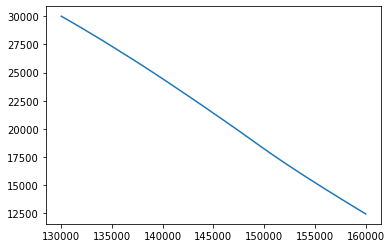

In [26]:
##c.  What is the bid amount the firm should offer to maximize its expected profit? 

bid_maximum = [x*1000 for x in range(130,161)]
rd.seed(101010)
mean_profit = list()
trials = (10000)
sample = list()
index = [0 for i in range (trials)]
for bid in bid_maximum:
    for i in range (trials):
        bid_ofthefirm = bid
        bid_competitor_1 = rd.uniform(bid_min, bid_max)
        bid_competitor_2 = rd.uniform(bid_min, bid_max)
        bid_win = max(bid_ofthefirm, bid_competitor_1, bid_competitor_2)
        if bid_win == bid_ofthefirm:
            profit = house_price - bid_win
            sample.append(profit)
    profit_mean = np.mean(sample)
    mean_profit.append(profit_mean)

plt.plot(bid_maximum, mean_profit)

In [27]:
bid_maximum[mean_profit.index(max(mean_profit))]

130000

In [ ]:
##QUESTION 6

# wedding planner must give the caterer an estimated number of guests for a wedding reception. 
#The probability that a guest responds to the RSVP invitationfor the wedding is 30%.  A guest who responds has a 90% 
#probability of actually attending the reception.  A guest who does not respond to the invitation has a 50% probability 
#of attending the reception. 
   #a.  If 300 guests were invited, what is the probability that at least 200 attend the reception?
  #b.  How many guests would you suggest the wedding planner estimate for the caterer and why? 

In [32]:
#input parameters

resp_per = 0.3
resp_attend_per = 0.9
notresp_attend_per = 0.5
guests_invited = 300
min_attend_guests = 200

(array([2.000e+00, 4.900e+01, 3.900e+02, 1.132e+03, 2.686e+03, 3.192e+03,
        1.733e+03, 6.860e+02, 1.200e+02, 1.000e+01]),
 array([151. , 157.7, 164.4, 171.1, 177.8, 184.5, 191.2, 197.9, 204.6,
        211.3, 218. ]),
 <a list of 10 Patch objects>)

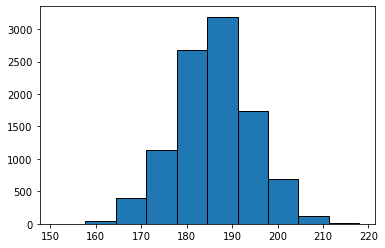

In [41]:
# simulation trials
rd.seed(101010)
trials = 10000
sample = list()
for i in range (trials):
    total_attend = 0
    for g in range (guests_invited):
        p1 = rd.uniform(0,1) #probability a guest responds to the invitation
        p2 = rd.uniform(0,1) #probability a guest responds and then shows up
        p3 = rd.uniform(0,1) #probability a guest doesn't respond, but then shows up
        if p1 <= resp_per: 
            if p2 <= resp_attend_per:
                total_attend += 1
        else:
            if p3 <= notresp_attend_per:
                total_attend += 1
                
    sample.append(total_attend)
    
plt.hist(sample, edgecolor = 'k')
        

In [46]:
#problem a:
sample_mean = np.mean(sample)
print(' The mean is %3.0f guests' % sample_mean)
proportion = sum(1 for x in sample if x > 200)/len(sample)
print('The probability at least 200 people attend the reception is %5.2f%%' % (100*proportion))

 The mean is 186 guests
The probability at least 200 people attend the reception is  4.18%


In [47]:
#problem b:
sample_mean = np.mean(sample)
sample_std = np.std(sample)
moe = 2.576*sample_std/len(sample)**0.5
lci = sample_mean - moe
uci = sample_mean + moe
print('Margin of error = %5.2f'% moe)
print('Lower confidence interval = %5.2f'% lci)
print('Upper confidence interval = %5.2f'% uci)
print('The 99%% confidence for the sample mean is (%6.2f, %6.2f)'% (lci,uci))

print('answers may vary: the probability of exceeding 205 guests is less than 1%; the probability of exceeding 220 guests is virtually zero.')

Margin of error =  0.22
Lower confidence interval = 185.76
Upper confidence interval = 186.19
The 99% confidence for the sample mean is (185.76, 186.19)
answers may vary: the probability of exceeding 205 guests is less than 1%; the probability of exceeding 220 guests is virtually zero.
